In [5]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [6]:
# data preparation
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
n_samples, n_features = X.shape

In [8]:
#model
input_size = n_features
outup_size = 1
model = nn.Linear(input_size, outup_size)

In [9]:
#loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
#training loop
num_epochs = 100
for epoch in range(num_epochs):
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # back propagation
    loss.backward()

    # update weight and bias
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f'epoch:{epoch + 1}, loss = {loss.item():.4f}') 

epoch:10, loss = 4349.0796
epoch:20, loss = 3247.4744
epoch:30, loss = 2449.7844
epoch:40, loss = 1871.5800
epoch:50, loss = 1452.0789
epoch:60, loss = 1147.4570
epoch:70, loss = 926.0797
epoch:80, loss = 765.0807
epoch:90, loss = 647.9141
epoch:100, loss = 562.5930


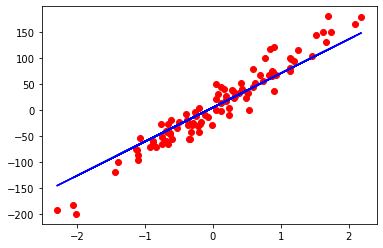

In [11]:
# plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()